# Explore here

In [3]:
# import Packages
import numpy as np
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from keras.preprocessing import image
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

2025-03-21 20:38:24.393331: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-21 20:38:24.698208: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-21 20:38:24.859526: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742589504.991209     635 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742589505.027851     635 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742589505.341810     635 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [4]:
#definir constantes
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [5]:
#preparar datos de training
nombres_archivos = os.listdir("../data/raw/train1")
categorias = []
for nombre in nombres_archivos:
    categoria = nombre.split('.')[0]
    if categoria == 'dog':
        categorias.append(1)
    else:
        categorias.append(0)

df = pd.DataFrame({
    'nombre': nombres_archivos,
    'categorias': categorias
})

In [6]:
df

,nombre,categorias
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0
...,...,...
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1


<Axes: xlabel='categorias'>

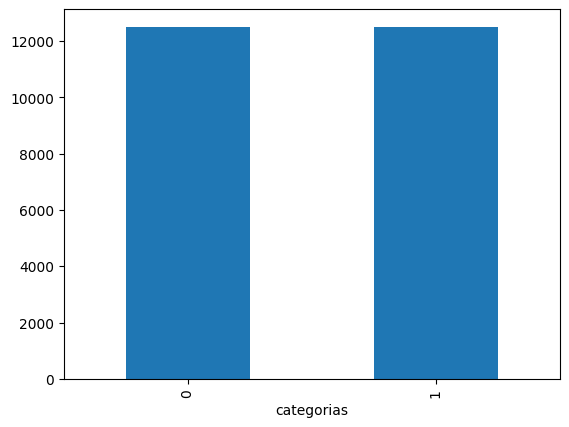

In [7]:
#conteo de categorias
df['categorias'].value_counts().plot.bar()

In [8]:
#crear listas de imagenes de perros y gatos
nombres_archivos_perros = df[df['categorias'] == 1]['nombre'].tolist()
nombres_archivos_gatos = df[df['categorias'] == 0]['nombre'].tolist()

nombres_archivos_perros

['dog.0.jpg',
 'dog.1.jpg',
 'dog.10.jpg',
 'dog.100.jpg',
 'dog.1000.jpg',
 'dog.10000.jpg',
 'dog.10001.jpg',
 'dog.10002.jpg',
 'dog.10003.jpg',
 'dog.10004.jpg',
 'dog.10005.jpg',
 'dog.10006.jpg',
 'dog.10007.jpg',
 'dog.10008.jpg',
 'dog.10009.jpg',
 'dog.1001.jpg',
 'dog.10010.jpg',
 'dog.10011.jpg',
 'dog.10012.jpg',
 'dog.10013.jpg',
 'dog.10014.jpg',
 'dog.10015.jpg',
 'dog.10016.jpg',
 'dog.10017.jpg',
 'dog.10018.jpg',
 'dog.10019.jpg',
 'dog.1002.jpg',
 'dog.10020.jpg',
 'dog.10021.jpg',
 'dog.10022.jpg',
 'dog.10023.jpg',
 'dog.10024.jpg',
 'dog.10025.jpg',
 'dog.10026.jpg',
 'dog.10027.jpg',
 'dog.10028.jpg',
 'dog.10029.jpg',
 'dog.1003.jpg',
 'dog.10030.jpg',
 'dog.10031.jpg',
 'dog.10032.jpg',
 'dog.10033.jpg',
 'dog.10034.jpg',
 'dog.10035.jpg',
 'dog.10036.jpg',
 'dog.10037.jpg',
 'dog.10038.jpg',
 'dog.10039.jpg',
 'dog.1004.jpg',
 'dog.10040.jpg',
 'dog.10041.jpg',
 'dog.10042.jpg',
 'dog.10043.jpg',
 'dog.10044.jpg',
 'dog.10045.jpg',
 'dog.10046.jpg',
 'dog.1004

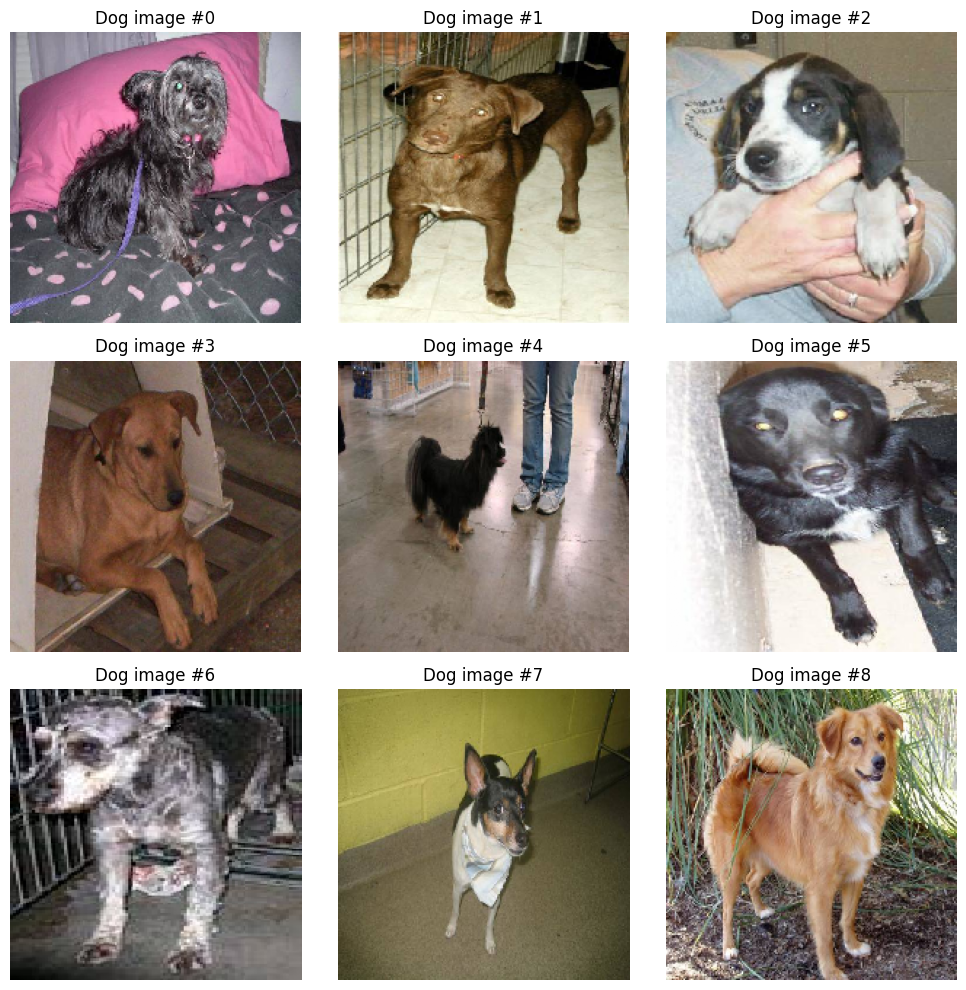

In [ ]:
# imprimir primeras 9 imagenes de perros
#directorio principal
data_dir = "../data/raw/train1"

# obtener lista de nombres de archivos de perros
nombres_archivos_perros = df[df['categorias'] == 1]['nombre'].tolist()

# creaer lista para guardar directorios de imagenes de perros
imagenes_perros = []

for i in range(9):
    img_path = os.path.join(data_dir, nombres_archivos_perros[i])  # get image path
    img = image.load_img(img_path, target_size=(200, 200))  # adjust to required size
    img_array = image.img_to_array(img)  # convert image to array
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    imagenes_perros.append(img_array)  # append image to list

plt.figure(figsize=(10, 10))  # set figure size

for i in range(9):
    plt.subplot(3, 3, i + 1)  # create 3x3 plot
    plt.imshow(imagenes_perros[i])  # display image i
    plt.title(f'Dog image #{i}')
    plt.axis('off')  # remove axis and their numbers

# mostrar grafico
plt.tight_layout()
plt.show()

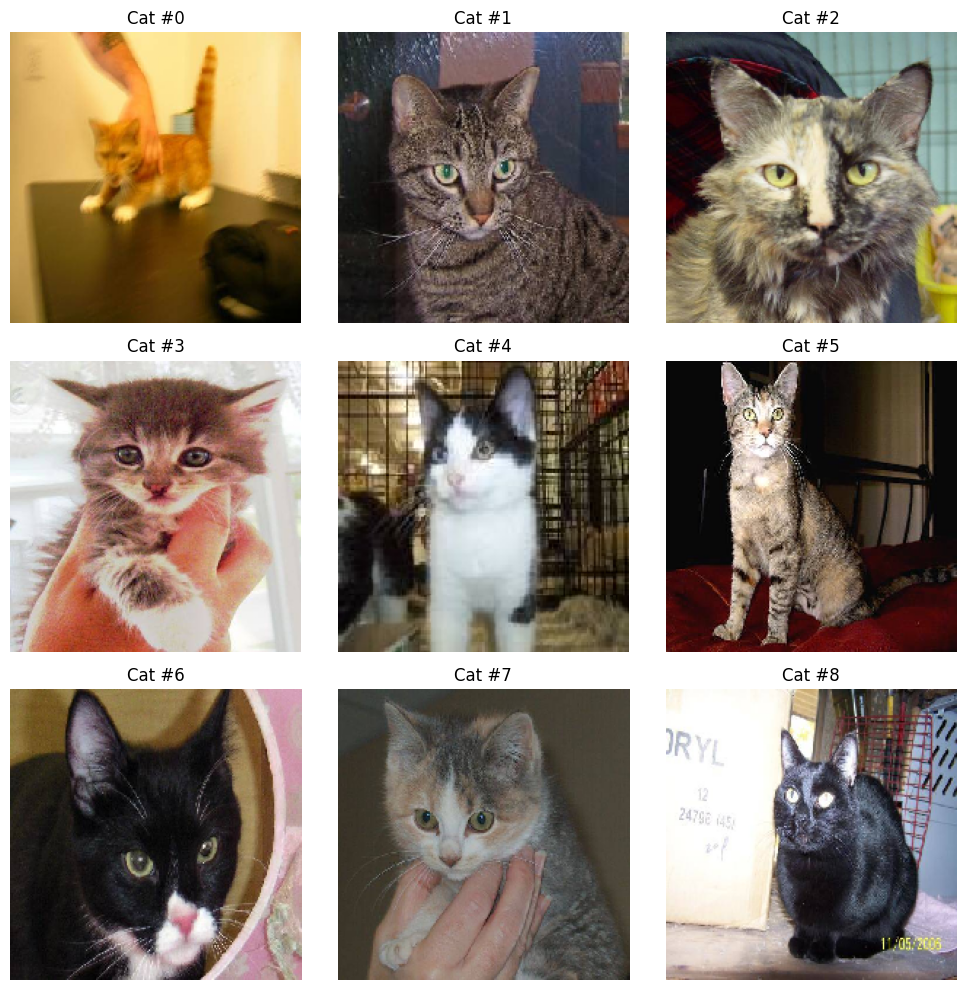

In [ ]:
# imprimir primeras 9 imagenes de gatos
#directorio principal
data_dir = "../data/raw/train1"

# obtener lista de nombres de archivos de gatos
nombres_archivos_gatos = df[df['categorias'] == 0]['nombre'].tolist()

# creaer lista para guardar directorios de imagenes de perros
imagenes_gatos = []

for i in range(9):
    img_path = os.path.join(data_dir, nombres_archivos_gatos[i])  # get image path
    img = image.load_img(img_path, target_size=(200, 200))  # adjust to required size
    img_array = image.img_to_array(img)  # convert image to array
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    imagenes_gatos.append(img_array)  # append image to list

plt.figure(figsize=(10, 10))  # set figure size

for i in range(9):
    plt.subplot(3, 3, i + 1)  # create 3x3 plot
    plt.imshow(imagenes_gatos[i])  # display image i
    plt.title(f'Cat #{i}')
    plt.axis('off')  # remove axis and their numbers

# mostrar grafico
plt.tight_layout()
plt.show()

In [ ]:
#crear arquitectura del modelo
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-21 20:38:35.002082: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,942,786 (49.37 MB)

 Trainable params: 12,941,314 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [13]:
#definir callbacks parada temprana y reduccion de tasa de aprendizaje
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [14]:
#reemplazar categorias numericas por string
df['categorias'] = df['categorias'].replace({0: 'cat', 1: 'dog'})

In [15]:
#separar df en train y validate
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [16]:
#fijar parametros de generacion y ajuste
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15


In [17]:
#generador de datos de entrenamiento
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "../data/raw/train1", 
    x_col='nombre',
    y_col='categorias',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [18]:
#generador de datos de validacion
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "../data/raw/train1", 
    x_col='nombre',
    y_col='categorias',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)


Found 5000 validated image filenames belonging to 2 classes.


In [19]:
#entrenar modelo
epochs = 50
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate // batch_size,
    steps_per_epoch=total_train // batch_size,
    callbacks=callbacks
)

/home/vscode/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 589s 440ms/step - accuracy: 0.5843 - loss: 0.9593 - val_accuracy: 0.7223 - val_loss: 0.5446 - learning_rate: 0.0010
Epoch 2/50


/home/vscode/.local/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


   1/1333 ━━━━━━━━━━━━━━━━━━━━ 6:51 309ms/step - accuracy: 0.5333 - loss: 0.6994

/home/vscode/.local/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - accuracy: 0.5333 - loss: 0.6994 - val_accuracy: 0.6925 - val_loss: 0.5824 - learning_rate: 0.0010
Epoch 3/50
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 589s 441ms/step - accuracy: 0.6975 - loss: 0.5867 - val_accuracy: 0.7089 - val_loss: 0.6382 - learning_rate: 0.0010
Epoch 4/50
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 38s 28ms/step - accuracy: 0.8000 - loss: 0.4987 - val_accuracy: 0.7225 - val_loss: 0.6177 - learning_rate: 0.0010
Epoch 5/50
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 544s 408ms/step - accuracy: 0.7480 - loss: 0.5271 - val_accuracy: 0.7385 - val_loss: 0.5337 - learning_rate: 0.0010
Epoch 6/50
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 38s 28ms/step - accuracy: 0.9333 - loss: 0.2478 - val_accuracy: 0.7592 - val_loss: 0.4983 - learning_rate: 0.0010
Epoch 7/50
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 579s 434ms/step - accuracy: 0.7696 - loss: 0.4863 - val_accuracy: 0.7972 - val_loss: 0.4382 - learning_rate: 0.0010
Epoch 8/50
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0

In [ ]:
#guardar modelo
model.save('model.h5')

In [32]:
#preparar data de test
test_filenames = os.listdir("../data/raw/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [33]:
#generador de test
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "../data/raw/test1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


In [34]:
#cargar modelo (retomar sesion)
model = load_model('model.h5')

In [35]:
#prediccion
predict = model.predict(test_generator, steps=int(np.ceil(nb_samples / batch_size)))
predict

/home/vscode/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


834/834 ━━━━━━━━━━━━━━━━━━━━ 122s 145ms/step


array([[0.12641929, 0.87358075],
       [0.95465016, 0.0453499 ],
       [0.21770015, 0.7822998 ],
       ...,
       [0.01159744, 0.98840255],
       [0.9770245 , 0.02297549],
       [0.05450818, 0.94549185]], dtype=float32)

In [75]:
#convertir prediccion en valores de 0 y 1
test_df['category'] = np.argmax(predict, axis=-1)
test_df['category'].value_counts()

category
1    6907
0    5593
Name: count, dtype: int64

In [76]:
test_df['category']

0        1
1        0
2        1
3        1
4        1
        ..
12495    0
12496    1
12497    1
12498    0
12499    1
Name: category, Length: 12500, dtype: int64

In [77]:
#reemplazar en df de test 1 y 0 por dog y cat
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

In [74]:
test_df['category']

0        1
1        0
2        1
3        1
4        1
        ..
12495    0
12496    1
12497    1
12498    0
12499    1
Name: category, Length: 12500, dtype: int64

<Axes: xlabel='category'>

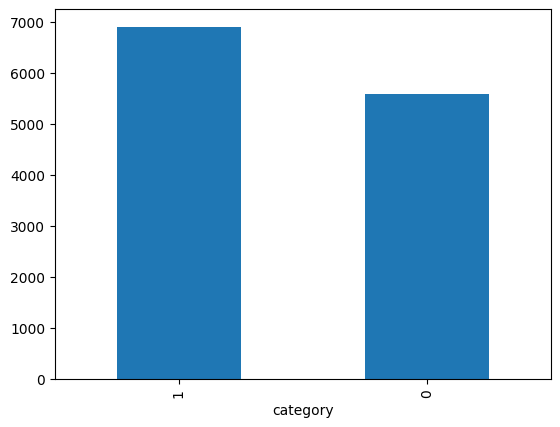

In [78]:
#comparar proporcion de predicciones de perro vs gato
test_df['category'].value_counts().plot.bar()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
dog


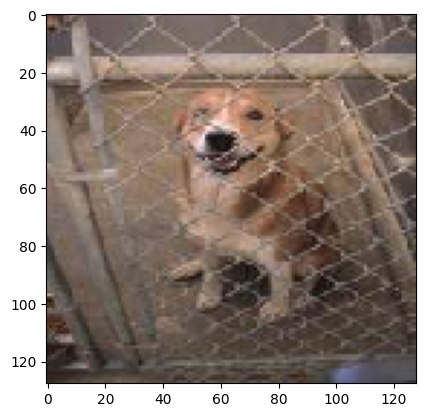

In [79]:
#elegir imagen aleatoria
test1_image_list = [f for f in os.listdir(os.path.join('../data/raw/test1/'))]
i = np.random.randint(0, len(test1_image_list))
img_path = os.path.join(data_dir)

#predecir imagen
img = load_img(f"../data/raw/test1/{i}.jpg", target_size=IMAGE_SIZE)
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("model.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")